### Interval detection in dataset

In [32]:
import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
with open('/home/imagry/offline_data/sheba_trips/entron_28-08/entron_28-08_LOCAL.json', 'r') as data_path:
    data = json.load(data_path)

data = pd.DataFrame(data['images'])
data.pop('camera_type')
# data.pop('vehicle_id')
data['time'] = data['file_name'].apply(lambda x: x.split('/')[-1][:-5])
data['cam_index'] = data['file_name'].apply(lambda x: x.split('/')[-3])
data.pop('fov')
data.pop('file_name')
data['time'] = data['time'].apply(lambda x: float(x))
# data['real time'] = data['time'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))
data = data.sort_values(by='time')
data['time_diff'] = data['time'] - data['time'].shift(1)
threshold = 10
data['interval_index'] = (data['time'] - data['time'].shift(1) > threshold).cumsum()
f_data = data[data['time_diff'].notnull()]
# f_data.head(20)
interval_data = f_data.groupby('interval_index')
print(max(f_data['interval_index']))
for interval, single_interval_data in interval_data:
    print(interval, len(single_interval_data))
# interval0 = interval_data.get_group(0).sort_values('time')
# interval0['cam_index'] = interval0['cam_index'].apply(lambda x: float(x))
# interval0['sequence'] = (interval0['cam_index'] - interval0['cam_index'].shift(1))
# interval0

128
0 8
1 6
2 42
3 24
4 15
5 15
6 52
7 312
8 129
9 55
10 29
11 43
12 53
13 22
14 20
15 18
16 91
17 7
18 87
19 69
20 8
21 92
22 14
23 91
24 14
25 20
26 41
27 38
28 14
29 16
30 63
31 11
32 41
33 60
34 31
35 2
36 65
37 33
38 78
39 96
40 90
41 150
42 45
43 44
44 6
45 99
46 65
47 75
48 35
49 50
50 21
51 24
52 24
53 71
54 39
55 38
56 94
57 564
58 1
59 11
60 26
61 62
62 72
63 31
64 84
65 35
66 114
67 11
68 8
69 57
70 26
71 98
72 85
73 117
74 46
75 88
76 162
77 6
78 43
79 134
80 24
81 124
82 252
83 9
84 37
85 6
86 12
87 20
88 50
89 16
90 207
91 14
92 55
93 16
94 10
95 32
96 21
97 44
98 37
99 70
100 20
101 30
102 57
103 15
104 17
105 49
106 28
107 29
108 27
109 113
110 34
111 11
112 31
113 52
114 75
115 48
116 68
117 13
118 33
119 26
120 28
121 28
122 38
123 41
124 31
125 13
126 42
127 31
128 39


In [193]:
data.sort_values('time').head(20)

,id,time,cam_index
27,27,1693480533.3305,3
28,28,1693480533.5319,3
29,29,1693480533.7306,3
30,30,1693480533.9303,3
31,31,1693480534.1312,3
32,32,1693480534.3298,3
0,0,1693480534.5094,2
33,33,1693480534.5301,3
1,1,1693480534.7098,2
34,34,1693480534.7269,3


In [ ]:
intervals = ['1677598659', 
             '16794097',
             '1685693213']


In [23]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2
import os
root_dir = '/home/imagry/results/model_2phaseV1_37c8987/ds_entron_28-08/ds_entron_28-08_train/'
cams = ['2','3','4']
images = dict()

# gather relevant images for each camera
for cam in cams:
    directory_path = os.path.join(root_dir, cam)
    matching_files = [filename for filename in os.listdir(directory_path) if filename.startswith('1684927610')]
    images[cam] = sorted(matching_files)

# view the images and count
# images['2'] = images['2'][1:-1]
# images['3'] = images['3'][2:]
for k,v in images.items():
    print(k, len(v),sorted(v))

# flip (map from image to cam)
# full_list = {v:key for key,value in images.items() for v in value}
# full_list = dict(sorted(full_list.items()))
# # full_list.values()
# full_list


2 8 ['1684927610.064843.jpeg', '1684927610.127862.jpeg', '1684927610.194806.jpeg', '1684927610.265517.jpeg', '1684927610.327595.jpeg', '1684927610.396438.jpeg', '1684927610.463224.jpeg', '1684927610.529433.jpeg']
3 0 []
4 0 []


In [19]:

output_video_name = 'output_video.avi'
image_width = 1024
image_height = 864
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_video_name, fourcc, 10, (image_width, image_height))


for index in range(len(images['2'])):
    # full_image = 
    image2 = os.path.join(root_dir, '2',images['2'][index])
    image3 = os.path.join(root_dir, '3',images['3'][index])
    # image4 = os.path.join(root_dir, '4',images['4'][index])
    image4 = '/home/itamar/Desktop/empty_image.jpeg'

    image_triplet = [image2,image3,image4]
    img = np.concatenate([cv2.imread(image) for image in image_triplet], axis=0)
    # if index == 180:
        # plt.imshow(img[:,:,::-1])
        # a = cv2.imwrite('/home/itamar/Desktop/debug.jpeg', img)
        # print(a)
        # break
    output_video.write(img)
output_video.release()

### oversample list

In [12]:
import json

oversample_names = ["infered_66.png", "infered_69.png", "infered_72.png", "infered_73.png", "infered_74.png", "infered_75.png", "infered_76.png", "infered_77.png", "infered_78.png", "infered_79.png", "infered_80.png", "infered_81.png", "infered_83.png", "infered_84.png", "infered_85.png", "infered_86.png", "infered_87.png", "infered_89.png", "infered_91.png", "infered_92.png", "infered_94.png", "infered_95.png", "infered_97.png", "infered_99.png", "infered_101.png", "infered_103.png", "infered_105.png", "infered_106.png", "infered_107.png", "infered_244.png", "infered_248.png", "infered_249.png", "infered_250.png", "infered_253.png", "infered_254.png", "infered_255.png", "infered_256.png", "infered_257.png", "infered_259.png", "infered_261.png", "infered_263.png", "infered_265.png", "infered_268.png", "infered_280.png", "infered_281.png", "infered_282.png", "infered_285.png", "infered_286.png", "infered_287.png", "infered_288.png", "infered_300.png", "infered_301.png", "infered_302.png", "infered_305.png", "infered_306.png", "infered_318.png", "infered_320.png", "infered_350.png", "infered_354.png", "infered_355.png", "infered_669.png", "infered_671.png", "infered_672.png", "infered_673.png", "infered_674.png", "infered_675.png", "infered_676.png", "infered_677.png", "infered_678.png", "infered_680.png", "infered_681.png", "infered_682.png", "infered_683.png", "infered_684.png", "infered_685.png", "infered_686.png", "infered_687.png", "infered_688.png", "infered_691.png", "infered_693.png", "infered_696.png", "infered_820.png", "infered_822.png", "infered_824.png", "infered_827.png", "infered_832.png", "infered_834.png", "infered_835.png", "infered_836.png", "infered_837.png", "infered_839.png", "infered_840.png", "infered_841.png", "infered_843.png", "infered_844.png", "infered_845.png", "infered_846.png", "infered_847.png", "infered_849.png", "infered_850.png", "infered_852.png", "infered_853.png", "infered_856.png", "infered_857.png", "infered_858.png", "infered_859.png", "infered_860.png", "infered_864.png", "infered_865.png", "infered_866.png", "infered_867.png", "infered_869.png", "infered_872.png", "infered_873.png", "infered_2021.png", "infered_2022.png", "infered_2023.png", "infered_2024.png", "infered_2026.png", "infered_2027.png", "infered_2028.png", "infered_2098.png", "infered_2099.png", "infered_2102.png", "infered_2103.png", "infered_2104.png", "infered_2105.png", "infered_2106.png", "infered_2107.png", "infered_2110.png", "infered_2111.png", "infered_2112.png", "infered_2164.png", "infered_2165.png", "infered_2175.png", "infered_2179.png", "infered_2185.png", "infered_2188.png", "infered_2190.png", "infered_2191.png", "infered_2194.png", "infered_2196.png", "infered_2197.png", "infered_2198.png", "infered_2199.png", "infered_2201.png", "infered_2202.png", "infered_2203.png", "infered_2204.png", "infered_2236.png", "infered_2237.png", "infered_2243.png", "infered_2244.png", "infered_2245.png", "infered_2246.png", "infered_2247.png", "infered_2248.png", "infered_2438.png", "infered_2439.png", "infered_2440.png", "infered_2443.png", "infered_2445.png", "infered_2446.png", "infered_2447.png", "infered_2558.png", "infered_2560.png", "infered_2562.png", "infered_2566.png", "infered_2568.png", "infered_2569.png", "infered_2571.png", "infered_2573.png", "infered_2576.png", "infered_2577.png", "infered_2586.png", "infered_2588.png", "infered_2590.png", "infered_2592.png", "infered_2593.png", "infered_2597.png", "infered_2598.png", "infered_2599.png", "infered_2601.png", "infered_2602.png", "infered_2603.png", "infered_2604.png", "infered_2605.png", "infered_2624.png", "infered_2625.png", "infered_2627.png", "infered_2628.png", "infered_2629.png", "infered_2631.png", "infered_2632.png", "infered_2634.png", "infered_2636.png", "infered_2639.png", "infered_2641.png", "infered_2643.png", "infered_2644.png", "infered_2645.png", "infered_2646.png", "infered_2650.png", "infered_2653.png", "infered_2654.png", "infered_2656.png", "infered_2658.png", "infered_2661.png", "infered_2663.png", "infered_2664.png", "infered_2666.png", "infered_2669.png", "infered_2672.png", "infered_2673.png", "infered_2674.png", "infered_2676.png", "infered_2679.png", "infered_2680.png", "infered_2682.png", "infered_2684.png", "infered_2685.png", "infered_2687.png", "infered_2691.png", "infered_2692.png", "infered_2695.png", "infered_2696.png", "infered_2697.png", "infered_2700.png", "infered_2703.png", "infered_2705.png", "infered_2707.png", "infered_2708.png", "infered_2709.png", "infered_2712.png", "infered_2713.png", "infered_2717.png", "infered_2720.png", "infered_2722.png", "infered_2725.png", "infered_2726.png", "infered_2730.png", "infered_2733.png", "infered_2735.png", "infered_2736.png", "infered_2738.png", "infered_2740.png", "infered_2743.png", "infered_2744.png", "infered_2747.png", "infered_2748.png", "infered_2749.png", "infered_2751.png", "infered_2752.png", "infered_2753.png", "infered_2754.png", "infered_2756.png", "infered_2757.png", "infered_2759.png", "infered_2762.png", "infered_2763.png", "infered_2764.png", "infered_2765.png", "infered_2766.png", "infered_2767.png", "infered_2768.png", "infered_2773.png", "infered_2775.png", "infered_2776.png", "infered_2778.png", "infered_2781.png", "infered_2786.png", "infered_2787.png", "infered_2791.png", "infered_2792.png", "infered_2793.png", "infered_2796.png", "infered_2798.png", "infered_2799.png", "infered_2800.png", "infered_2801.png", "infered_2805.png", "infered_2807.png", "infered_2808.png", "infered_2809.png", "infered_2811.png", "infered_2813.png", "infered_2815.png", "infered_2816.png", "infered_2819.png", "infered_2822.png", "infered_2823.png", "infered_2831.png", "infered_2833.png", "infered_2834.png", "infered_2837.png", "infered_2838.png", "infered_2839.png", "infered_2842.png", "infered_2843.png", "infered_2936.png", "infered_2938.png", "infered_2939.png", "infered_2943.png", "infered_2945.png", "infered_2987.png", "infered_2988.png", "infered_2990.png", "infered_2991.png", "infered_2992.png", "infered_2994.png", "infered_2998.png", "infered_3258.png", "infered_3260.png", "infered_3261.png", "infered_3262.png", "infered_3264.png", "infered_3265.png", "infered_3268.png", "infered_3270.png", "infered_3271.png", "infered_3275.png", "infered_3278.png", "infered_3279.png", "infered_3280.png", "infered_3281.png", "infered_3282.png", "infered_3283.png", "infered_3284.png", "infered_3285.png", "infered_3288.png", "infered_3293.png", "infered_3295.png", "infered_3297.png", "infered_3299.png", "infered_3309.png", "infered_3310.png", "infered_3312.png", "infered_3314.png", "infered_3316.png", "infered_3317.png", "infered_3320.png", "infered_3322.png", "infered_3324.png", "infered_3325.png", "infered_3327.png", "infered_3328.png", "infered_3331.png", "infered_3332.png", "infered_3334.png", "infered_3335.png", "infered_3336.png", "infered_3339.png", "infered_3340.png", "infered_3343.png", "infered_3344.png", "infered_3717.png", "infered_3718.png", "infered_3720.png", "infered_3721.png", "infered_3723.png", "infered_3725.png", "infered_3726.png", "infered_3727.png", "infered_3730.png", "infered_3733.png", "infered_3734.png", "infered_3735.png", "infered_3736.png", "infered_3737.png", "infered_3739.png", "infered_3740.png", "infered_3742.png", "infered_3744.png", "infered_3746.png", "infered_3748.png", "infered_3749.png", "infered_3804.png", "infered_3805.png", "infered_3807.png", "infered_3808.png", "infered_3812.png", "infered_3814.png", "infered_3815.png", "infered_3816.png", "infered_3817.png", "infered_3819.png", "infered_3820.png", "infered_3821.png", "infered_3823.png", "infered_3824.png", "infered_3825.png", "infered_3913.png", "infered_3916.png", "infered_3918.png", "infered_4708.png", "infered_4709.png", "infered_4713.png", "infered_4714.png", "infered_4716.png", "infered_4718.png", "infered_4720.png", "infered_4724.png", "infered_4725.png", "infered_4876.png", "infered_4877.png", "infered_4878.png", "infered_4879.png", "infered_4880.png", "infered_4882.png", "infered_4884.png", "infered_4885.png", "infered_4886.png", "infered_4888.png", "infered_4889.png", "infered_4890.png", "infered_4894.png", "infered_4895.png", "infered_4916.png", "infered_4917.png", "infered_4918.png", "infered_4921.png", "infered_4922.png", "infered_4923.png", "infered_4925.png", "infered_4926.png", "infered_4927.png", "infered_4928.png", "infered_4929.png", "infered_4930.png", "infered_4931.png", "infered_4932.png", "infered_4934.png", "infered_4936.png", "infered_4937.png", "infered_4938.png", "infered_4975.png", "infered_4976.png", "infered_4979.png", "infered_4980.png", "infered_4981.png", "infered_4984.png", "infered_4988.png", "infered_4989.png", "infered_4990.png", "infered_4991.png", "infered_4992.png", "infered_4993.png", "infered_4994.png", "infered_5013.png", "infered_5014.png", "infered_5016.png", "infered_5017.png", "infered_5020.png", "infered_5022.png", "infered_5023.png", "infered_5024.png", "infered_5025.png", "infered_5108.png", "infered_5111.png", "infered_5114.png", "infered_5115.png", "infered_5117.png", "infered_5119.png", "infered_5121.png", "infered_5126.png", "infered_5127.png", "infered_5130.png", "infered_5133.png", "infered_5134.png", "infered_5135.png", "infered_5136.png", "infered_5137.png", "infered_5138.png", "infered_5141.png", "infered_5144.png", "infered_5145.png", "infered_5146.png", "infered_5148.png", "infered_5149.png", "infered_5150.png", "infered_5151.png", "infered_5152.png", "infered_5155.png", "infered_5195.png", "infered_5196.png", "infered_5197.png", "infered_5198.png", "infered_5199.png", "infered_5200.png", "infered_5202.png", "infered_5203.png", "infered_5205.png", "infered_5207.png", "infered_5208.png", "infered_5212.png", "infered_5215.png", "infered_5217.png", "infered_5219.png", "infered_5220.png", "infered_5223.png", "infered_5224.png", "infered_5226.png", "infered_5229.png", "infered_5230.png", "infered_5233.png", "infered_5235.png", "infered_5765.png", "infered_5766.png", "infered_5769.png", "infered_5772.png", "infered_5774.png", "infered_5776.png", "infered_5777.png", "infered_5778.png", "infered_5779.png", "infered_5780.png", "infered_5781.png", "infered_5785.png", "infered_5788.png", "infered_5789.png", "infered_5790.png", "infered_5791.png", "infered_5793.png", "infered_5794.png", "infered_5795.png", "infered_5798.png", "infered_5799.png", "infered_5801.png", "infered_5803.png", "infered_5805.png", "infered_5809.png", "infered_5810.png", "infered_5813.png", "infered_5817.png", "infered_5818.png", "infered_5819.png", "infered_5821.png", "infered_5822.png", "infered_5823.png", "infered_5824.png", "infered_5826.png", "infered_5828.png", "infered_5829.png", "infered_5832.png", "infered_6004.png", "infered_6005.png", "infered_6007.png", "infered_6010.png", "infered_6012.png", "infered_6013.png", "infered_6014.png", "infered_6015.png", "infered_6016.png", "infered_6018.png", "infered_6019.png", "infered_6020.png", "infered_6021.png", "infered_6023.png", "infered_6027.png", "infered_6029.png", "infered_6031.png", "infered_6032.png", "infered_6033.png", "infered_6034.png", "infered_6035.png", "infered_6036.png", "infered_6037.png", "infered_6038.png", "infered_6040.png", "infered_6041.png", "infered_6044.png", "infered_6045.png", "infered_6047.png", "infered_6049.png", "infered_6051.png", "infered_6053.png", "infered_6055.png", "infered_6056.png", "infered_6061.png", "infered_6063.png", "infered_6065.png", "infered_6068.png", "infered_6069.png", "infered_6072.png", "infered_6075.png", "infered_6815.png", "infered_6816.png", "infered_6817.png", "infered_6818.png", "infered_6819.png", "infered_6823.png", "infered_6824.png", "infered_6827.png", "infered_6828.png", "infered_6830.png", "infered_6832.png", "infered_6836.png", "infered_6842.png", "infered_6845.png", "infered_6846.png", "infered_6848.png", "infered_6849.png", "infered_6851.png", "infered_6944.png", "infered_6947.png", "infered_6949.png", "infered_6953.png", "infered_6955.png", "infered_6957.png", "infered_7025.png", "infered_7419.png", "infered_7421.png", "infered_7423.png", "infered_7427.png", "infered_7429.png", "infered_7432.png", "infered_7578.png", "infered_7579.png", "infered_7580.png", "infered_7581.png", "infered_7582.png", "infered_8132.png", "infered_8136.png", "infered_8137.png", "infered_8138.png", "infered_8517.png", "infered_8519.png", "infered_8521.png", "infered_8522.png", "infered_8523.png", "infered_8524.png", "infered_8526.png", "infered_8528.png", "infered_8529.png", "infered_8530.png", "infered_8531.png", "infered_8532.png", "infered_8533.png", "infered_8536.png", "infered_8538.png", "infered_8540.png", "infered_8641.png", "infered_8643.png", "infered_8644.png", "infered_8646.png", "infered_8647.png", "infered_8650.png", "infered_8651.png", "infered_9152.png", "infered_9153.png", "infered_9154.png", "infered_9157.png", "infered_9158.png", "infered_9159.png", "infered_9163.png", "infered_9164.png", "infered_9165.png", "infered_9166.png", "infered_9168.png", "infered_9169.png", "infered_9170.png", "infered_9171.png", "infered_9173.png", "infered_9174.png", "infered_9175.png", "infered_9176.png", "infered_9177.png", "infered_9178.png", "infered_9179.png", "infered_9182.png", "infered_9183.png", "infered_9184.png", "infered_9185.png", "infered_9186.png", "infered_9188.png", "infered_9189.png", "infered_9191.png", "infered_9193.png", "infered_9194.png", "infered_9197.png", "infered_9198.png", "infered_9199.png", "infered_9200.png", "infered_9202.png", "infered_9203.png", "infered_9204.png", "infered_9205.png", "infered_9396.png", "infered_9397.png", "infered_9399.png", "infered_9405.png", "infered_9406.png", "infered_9408.png", "infered_9409.png", "infered_9413.png", "infered_9415.png", "infered_9416.png", "infered_9417.png", "infered_9419.png", "infered_9421.png", "infered_9422.png", "infered_9423.png", "infered_9424.png", "infered_9425.png", "infered_9426.png", "infered_9428.png", "infered_9543.png", ]
oversample_ids = [int(x.split('_')[1].split('.')[0]) for x in oversample_names]
# oversample_ids

data_file_path = '
/home/imagryoffline_data/sheba_trips/entron_11-07/entron_11-07_train.json'

with open(data_file_path, 'r') as data_file:
    data = json.load(data_file)

oversample_images = [i['file_name'] for i in data['images'] if i['id'] in oversample_ids]
oversample_images_local = [image.replace('
/home/imagryDepthData/Depth_annotation_data/', '
/home/imagryoffline_data/sheba_trips/images/') for image in oversample_images]
# oversample_images_local

In [13]:
""" WRITE LIST OF IMAGE NAMES TO A TEXT FILE """
# output_path = '/opt/imagry/CenterNet/src/scripts/data/oversample_image_list_ibrahim.txt'
# with open(output_path, "w") as file:
#     for string in oversample_images_local:
#         file.write(string + "\n")

' WRITE LIST OF IMAGE NAMES TO A TEXT FILE '

## Venn of two datasets - frames and trips

In [14]:
import json
old_ds = '
/home/imagryoffline_data/sheba_trips/old_entron_ds/entron_10150.json'
new_ds = '
/home/imagryoffline_data/sheba_trips/entron_28-08/entron_28-08.json'

with open(old_ds, 'r') as old_ds_file:
    old_data = json.load(old_ds_file)

with open(new_ds, 'r') as new_ds_file:
    new_data = json.load(new_ds_file)

old_data_frames = set()
old_data_trips = set()
for i in range(len(old_data['images'])):
    old_data_frames.add(old_data['images'][i]['file_name'].split('/')[-1])
    old_data_trips.add(old_data['images'][i]['file_name'].split('/')[-5])

new_data_frames = set()
new_data_trips = set()
for i in range(len(new_data['images'])):
    new_data_frames.add(new_data['images'][i]['file_name'].split('/')[-1])
    new_data_trips.add(new_data['images'][i]['file_name'].split('/')[-5])

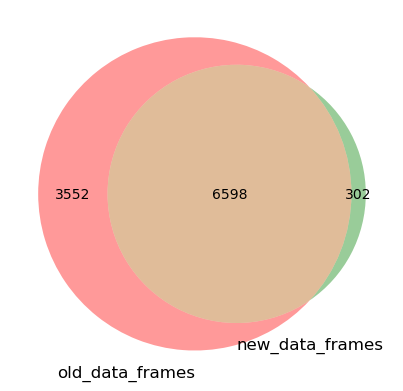

In [15]:
import matplotlib.pyplot as plt
!pip install matplotlib_venn
from matplotlib_venn import venn2

a = venn2(subsets=(old_data_frames, new_data_frames), set_labels=('old_data_frames', 'new_data_frames'))

In [16]:
shared_frames = old_data_frames.intersection(new_data_frames)
# len(shared_frames)
only_in_new_frames = (new_data_frames.difference(shared_frames))
only_in_old_frames = (old_data_frames.difference(shared_frames))

print(f'{len(only_in_new_frames) = }')
print(f'{len(only_in_old_frames) = }')
print(f'{len(shared_frames) = }')


len(only_in_new_frames) = 302
len(only_in_old_frames) = 3552
len(shared_frames) = 6598


In [17]:
shared_trips = old_data_trips.intersection(new_data_trips)
only_in_new_trips = (new_data_trips.difference(shared_trips))
print(f'{only_in_new_trips = }')

only_in_old_trips = (old_data_trips.difference(shared_trips))
print(f'{only_in_old_trips = }')

print(f'{shared_trips = }')

only_in_new_trips = {'2023-06-18T10_21_49', '2023-07-04T16_41_49', '2023-06-18T11_49_29'}
only_in_old_trips = {'2023-06-28T12_13_17', '2023-06-22T14_13_39', '2023-03-02T16_32_22', '2023-07-02T11_36_29', '2023-06-05T16_35_38', '2023-06-22T14_51_19', '2023-02-23T13_50_12', '2023-06-15T10_38_35', '2023-03-19T11_03_44', '2023-07-02T12_14_29', '2023-07-02T14_52_03', '2023-02-23T09_29_34', '2023-03-19T11_13_46', '2023-06-02T11_13_08', '2023-06-29T15_41_17'}
shared_trips = {'2023-06-22T14_03_37', '2023-06-02T11_45_46', '2023-03-02T17_42_32', '2023-06-02T11_25_45', '2023-05-24T12_21_50', '2023-03-02T17_32_30', '2023-05-24T14_32_04', '2023-06-18T12_09_30', '2023-02-28T17_20_44', '2023-03-07T12_23_31', '2023-02-28T17_30_44', '2023-02-23T10_36_54', '2023-02-28T17_10_43', '2023-06-02T11_35_46', '2023-03-20T10_50_11', '2023-06-22T15_01_21', '2023-03-21T16_41_31', '2023-05-24T14_22_02', '2023-06-22T14_23_39', '2023-03-07T12_33_33', '2023-02-23T10_46_55', '2023-06-02T11_58_18', '2023-02-28T17_43_48',

In [18]:
## create intersection dataset
intersection_data = {"images": [], "annotations": []}
intersection_data['categories'], intersection_data['cameras_info'] = old_data['categories'], new_data['cameras_info']

intersection_image_ids = []
for image in old_data['images']:
    if image['file_name'].split('/')[-1] in shared_frames:
        intersection_image_ids.append(image['id'])
        intersection_data['images'].append(image)

intersection_data['annotations'] = [ann for ann in old_data['annotations'] if ann['image_id'] in intersection_image_ids]
for k,v in intersection_data.items():
    print(f'{k}: {len(v) = }')

images: len(v) = 6598
annotations: len(v) = 130609
categories: len(v) = 191
cameras_info: len(v) = 2


In [19]:
with open('
/home/imagryoffline_data/sheba_trips/entron_28-08/NEW_INTERSECTION.json','w') as converted_json:
    json.dump(intersection_data,converted_json, indent = "")

## cam index VS trip _id

In [ ]:
import pandas as pd
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

with open('
/home/imagryoffline_data/sheba_trips/entron_23-08/entron_23-08_LOCAL.json','r') as data_file:
    data = json.load(data_file)

image_df = pd.DataFrame(data['images'])
image_df['trip_id'] = image_df['file_name'].apply(lambda s: re.search(r"\d\d\d\d-\d\d-\d\dT\d\d_\d\d_\d\d", s).group(0))
image_df['cam_index'] = image_df['file_name'].apply(lambda x: x.split('/')[-3])
pivot_table = image_df.pivot_table(index='trip_id', columns='cam_index', aggfunc='size', fill_value=0)
pivot_table['RowSum'] = pivot_table.sum(axis=1)
sorted_pivot = pivot_table.sort_values(by='RowSum', ascending=False)
sorted_pivot
# sns.heatmap(sorted_pivot, annot=True, cmap='YlGnBu', fmt='d')
# plt.tight_layout()
# plt.show()

cam_index,0,1,2,3,4,5,6,7,RowSum
trip_id,,,,,,,,,
2023-05-24T14_22_02,48,0,348,170,15,0,0,0,581
2023-03-21T16_41_31,0,0,188,188,189,0,0,0,565
2023-06-02T11_25_45,0,0,161,71,139,0,0,0,371
2023-03-02T15_25_57,0,0,0,0,0,0,315,0,315
2023-03-07T12_23_31,48,48,63,63,63,0,0,0,285
2023-05-24T14_32_04,1,0,75,76,109,0,0,0,261
2023-06-02T11_58_18,0,0,79,100,52,0,0,0,231
2023-05-24T12_41_52,0,0,164,40,21,0,0,0,225
2023-02-28T17_33_47,0,0,58,79,60,0,0,0,197


## Angle conversion

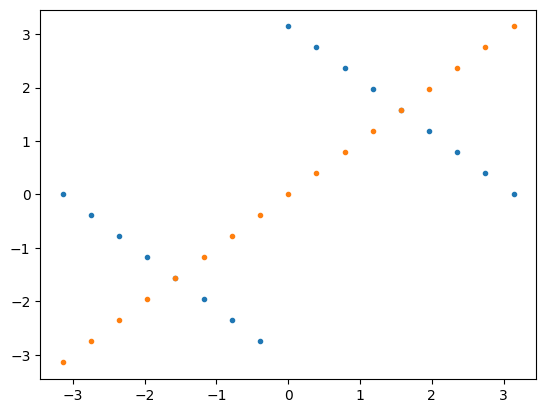

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def change_rotation_y(alpha):
    if alpha < 0:
        alpha = -np.pi-alpha
    else:
        alpha = np.pi-alpha
    return alpha

alphas = list(np.arange(-np.pi, np.pi+np.pi/8, np.pi/8))
changed = []
for alpha in alphas:
    changed.append(change_rotation_y(alpha))

plt.plot(alphas, changed, '.')
plt.plot(alphas,alphas,'.')

## concatenate inference images for comparison

In [ ]:
import numpy as np
import cv2
import os
font = cv2.FONT_HERSHEY_SIMPLEX
color = (0, 0, 255)
thickness = 1
fontScale = 0.4

def write_model_names(img, models):
    for i,model in enumerate(models):
        y = int(i * (np.shape(img)[0] / len(models)))
        cv2.putText(img, model, (20,y+20), font, fontScale, color, thickness, cv2.LINE_AA )
    return img


folders = [
    '
/home/imagryresults/model_exp1_entron_11-07_pretrained_2619bfb/ds_entron_11-07_local_val/',
    '
/home/imagryresults/model_exp_0208_long_model_last/ds_entron_11-07_local_val/'   
]
models = [
    'exp1_entron_11-07_pretrained_2619bfb',
    'exp_0208_long_model_last'
]
 

new_folder = "
/home/imagryresults/model_exp_0208_long_model_last/ds_entron_11-07_local_val/compare_to_exp1/"
# os.makedirs(new_folder)

 

files = [x for x in os.listdir(folders[0]) if x.endswith('jpeg')]

 

for f in files:
    # print(f)
    img = np.concatenate([cv2.imread(os.path.join(folder, f)) for folder in folders], axis=0)
    img = write_model_names(img,models)
    cv2.imwrite(os.path.join(new_folder, f), img)

 

print("done!")

done!


## Rotataion loss

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torch.nn as nn
from .utils import _tranpose_and_gather_feat
import torch.nn.functional as F
import numpy as np

## lr exp's

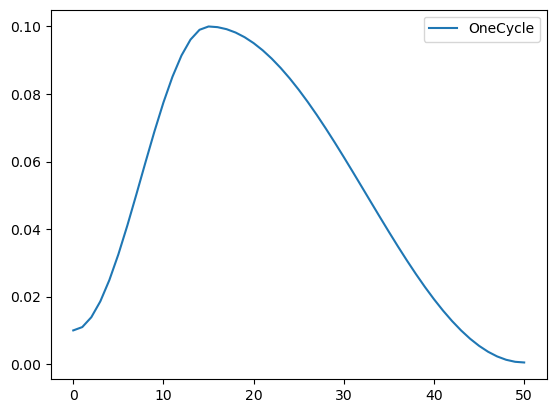

In [ ]:
# %%
import torch
import matplotlib.pyplot as plt

net = torch.nn.Linear(100,1)

# %%
N = 64*100
init_lr = 0.1
plt.figure()
opt = torch.optim.Adam(net.parameters(), lr=init_lr)
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx
# EXPONENTIAL

# sched = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.995)

# lrs = [ sched.get_last_lr()[0] ]
# for i in range(N*2):
#     sched.step()
#     lrs.append( sched.get_last_lr()[0] )

# plt.plot(range(len(lrs)), lrs, label="Exponential")

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx
# LINEAR

# sched = torch.optim.lr_scheduler.LinearLR(opt, start_factor=0.9, end_factor=0.1 ,total_iters=N)

# lrs = [ sched.get_last_lr()[0] ]
# for i in range(N*2):
#     sched.step()
#     lrs.append( sched.get_last_lr()[0] )

# plt.plot(range(len(lrs)), lrs, label="Linear")

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx
# POLYNOMIAL

# sched = torch.optim.lr_scheduler.PolynomialLR(opt, total_iters=N, power=3)

# lrs = [ sched.get_last_lr()[0] ]
# for i in range(N*2):
#     sched.step()
#     lrs.append( sched.get_last_lr()[0] )


# plt.plot(range(len(lrs)), lrs, label="Polynomial")

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx
# COS ANNEAL
# sched = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=N, eta_min=init_lr/10)

# lrs = [ sched.get_last_lr()[0] ]
# for i in range(N*2):
#     sched.step()
#     lrs.append( sched.get_last_lr()[0] )


# plt.plot(range(len(lrs)), lrs, label="Cosine")

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx

# sched = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(opt, T_0=N, eta_min=init_lr/10, T_mult=2)

# lrs = [ sched.get_last_lr()[0] ]
# for i in range(N*2):
#     sched.step()
#     lrs.append( sched.get_last_lr()[0] )

# plt.plot(range(len(lrs)), lrs, label="Cosine WR")

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx

# opt = torch.optim.SGD(net.parameters(), lr=init_lr)
# sched = torch.optim.lr_scheduler.CyclicLR(opt, max_lr=init_lr, base_lr=init_lr/10, mode="triangular2")

# lrs = [ sched.get_last_lr()[0] ]
# for i in range(N*2):
#     sched.step()
#     lrs.append( sched.get_last_lr()[0] )

# plt.plot(range(len(lrs)), lrs, label="Cyclic")

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx

ds_size = 1000
epochs = 50
sched = torch.optim.lr_scheduler.OneCycleLR(opt, max_lr=0.1, steps_per_epoch=ds_size, epochs=epochs, final_div_factor=20, div_factor=10, three_phase=False)
lrs = [ sched.get_last_lr()[0] ]
for i in range(epochs):
    for j in range(ds_size):
        sched.step()
    lrs.append( sched.get_last_lr()[0] )

plt.plot(range(len(lrs)), lrs, label="OneCycle")


plt.legend()
plt.show()
# %%

## debug functionatlity and printing (???)

In [ ]:
import inspect

def debug_print(text, debug_level):
    print(debug_level*"\t",f'{debug_level = }')
    print(debug_level*'\t', text)

def second_function(letter, debug):
    print(f'{debug = }')
    if debug<=0:
        frame = inspect.currentframe()
        function_name = inspect.getframeinfo(frame).function
        print(f"Currently executing function: {function_name}")
        debug_print(f'recieving: {letter}', debug)
    double_letter = letter + letter
    if debug<=0:
        debug_print(f'returning: {double_letter}', debug)
    return double_letter


def first_function(debug = 0):
    b = second_function('a', debug+1)
    if debug<=0:
        frame = inspect.currentframe()
        function_name = inspect.getframeinfo(frame).function
        print(f"Currently executing function: {function_name}")
        debug_print(f"returning {b}", debug+1)



first_function()

debug = 1
Currently executing function: first_function
	 debug_level = 1
	 returning aa


## Colors

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


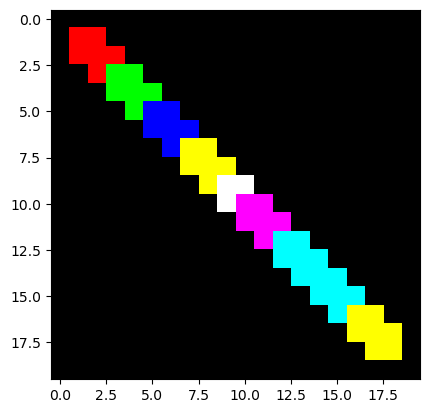

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


colorz = [
    (0, 0, 0),
    (100, 0, 0),
    (200, 0, 0),
    (0, 100, 0),
    (0, 255, 0),
    (0, 0, 100),
    (0, 0, 200),
    (100, 100, 0),
    (200, 100, 0),
    (100, 200, 255),
    (100, 0, 100),
    (200, 0, 100),
    (0, 255, 255),
    (0, 100, 100),
    (0, 200, 100),
    (0, 100, 220),
    (255, 255, 0),
    (255, 100, 0)
]


image = np.zeros((20,20,3))

for index,color in enumerate(colorz):
    cv2.rectangle(image, (index, index), ((index+1), (index+1)), color,-1)

plt.imshow(image)

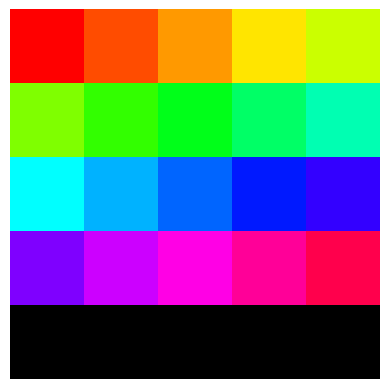

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_distinguishable_colors(num_colors):
    hue_values = np.linspace(0, 1, num_colors, endpoint=False)
    saturation = 1
    value = 1
    colors = []
    for hue in hue_values:
        rgb = hsv_to_rgb(hue, saturation, value)
        colors.append(rgb)
    return colors

def hsv_to_rgb(h, s, v):
    if s == 0.0:
        return int(v * 255), int(v * 255), int(v * 255)
    i = int(h * 6.0)
    f = (h * 6.0) - i
    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))
    i %= 6
    if i == 0:
        return int(v * 255), int(t * 255), int(p * 255)
    if i == 1:
        return int(q * 255), int(v * 255), int(p * 255)
    if i == 2:
        return int(p * 255), int(v * 255), int(t * 255)
    if i == 3:
        return int(p * 255), int(q * 255), int(v * 255)
    if i == 4:
        return int(t * 255), int(p * 255), int(v * 255)
    if i == 5:
        return int(v * 255), int(p * 255), int(q * 255)

# Generate 18 distinguishable colors
num_colors = 20
distinguishable_colors = generate_distinguishable_colors(num_colors)

# Create a color grid
grid_size = int(np.ceil(np.sqrt(num_colors)))
color_grid = np.zeros((grid_size, grid_size, 3), dtype=np.uint8)
for i, color in enumerate(distinguishable_colors):
    row = i // grid_size
    col = i % grid_size
    color_grid[row, col] = color

# Display the color grid
plt.imshow(color_grid)
plt.axis('off')
plt.show()

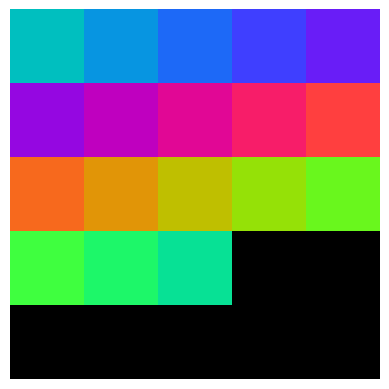

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_distinguishable_colors(num_colors):
    colors = []
    for i in range(num_colors):
        hue = i * ((360 / num_colors)/2)
        r = np.sin(np.deg2rad(hue)) ** 2
        g = np.sin(np.deg2rad(hue + 120)) ** 2
        b = np.sin(np.deg2rad(hue + 240)) ** 2
        color = (int(r * 255), int(g * 255), int(b * 255))
        colors.append(color)
    return colors

# Generate 18 distinguishable colors
num_colors = 18
distinguishable_colors = generate_distinguishable_colors(num_colors)

# Create a color grid
grid_size = int(np.ceil(np.sqrt(num_colors)))
color_grid = np.zeros((grid_size, grid_size, 3), dtype=np.uint8)
for i, color in enumerate(distinguishable_colors):
    row = i // grid_size
    col = i % grid_size
    color_grid[row, col] = color

# Display the color grid
plt.imshow(color_grid)
plt.axis('off')
plt.show()

## DEGS AND RADS

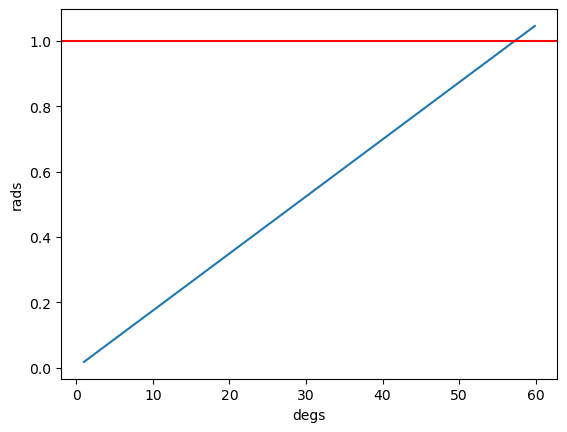

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

degs = np.arange(1,60,0.1)
# print(degs)
rads = np.deg2rad(degs)
# rads

plt.plot(degs,rads)
plt.axhline(y=1, color='r', linestyle='-')
plt.xlabel('degs')
plt.ylabel('rads')
plt.show()


In [ ]:
import json
from collections import defaultdict
import tqdm
import pandas as pd
from collections import OrderedDict
import os

ds = '
/home/imagryoffline_data/sheba_trips/entron8311/entron8311.json'

with open(ds,"r") as data_file:
    data=json.load(data_file)

ds_name = os.path.basename(ds).split('.')[0]

In [ ]:
category_counter = defaultdict(int)
max_dist = 0
station_annotations = []
# count the existing categories
for ann_data in data['annotations']:
    if 174<= ann_data['category_id'] <=191:
        # count per category
        category_counter[ann_data['category_id']] += 1
        
        # save bus annotations
        station_annotations.append(ann_data)
        
        # find max distance station
        if ann_data['location'][2] > max_dist:
            max_dist = ann_data['location'][2]
            image_id = ann_data['image_id']
            # print(f'{ann_data["category_id"] = }')
            # print(f'{data["images"][image_id]["file_name"]}')
            # print(f'{max_dist = }')

# bus categories that weren't found - mark as 0 for the figure
for i in range(174,192):
    if i not in category_counter.keys():
        category_counter[i] = 0

# max_dist, image_id, data['images'][image_id]['file_name']

ann_data["category_id"] = 177
/home/imagry/offline_data/sheba_trips/images/2023-05-24T12_21_50/3d_images/2/left/1684920264.087639.jpeg
max_dist = 9.27
ann_data["category_id"] = 178
/home/imagry/offline_data/sheba_trips/images/2023-05-24T12_21_50/3d_images/2/left/1684920317.410075.jpeg
max_dist = 10.53
ann_data["category_id"] = 186
/home/imagry/offline_data/sheba_trips/images/2023-05-24T12_21_50/3d_images/4/left/1684920317.424142.jpeg
max_dist = 51.12


In [ ]:
category_counter = (category_counter)
category_counter = OrderedDict(sorted(category_counter.items()))

class_mapping = {x['id']:x['name'] for x in data['categories']}
class_names = [class_mapping.get(index) for index in category_counter.keys()]
class_names = [item.replace(' ', '\n') for item in class_names]

In [ ]:
# replace cat id with cat name
new_category_counter = {new_key: category_counter[old_key] for new_key, old_key in zip(class_names, category_counter.keys())}

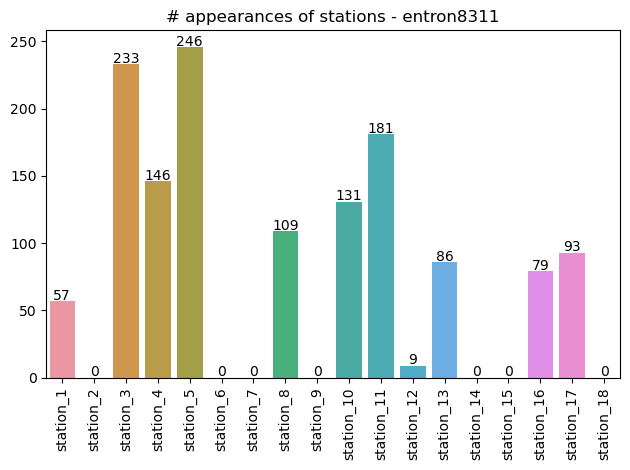

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot using Seaborn
sns.barplot(x=list(new_category_counter.keys()), y=list(new_category_counter.values()))

# Add labels to the bars
for i, count in enumerate(category_counter.values()):
    plt.text(i, count + 1, f'{count}', ha='center')

# Adjust the rotation of x-axis labels
plt.xticks(rotation='90')

# Set the title
plt.title(f"# appearances of stations - {ds_name}")

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
station_annotations_df = pd.DataFrame(station_annotations)
# station_annotations_df

,image_id,id,category_id,bbox,rotation_y,depth,alpha,location,azimuth_3d,azimuth_2d,azimuth_shift,image_fov,cx_3d,cy_3d,dim,pitch_angle,roll_angle,min_depth
0,5978,110126,177,"[1170, 209, 43, 47]",1.674996,9.27,1.332997,"[3.3, 4.7, 9.27]",0.341999,0.331670,0.010328,1.919862,1199.294227,220.941031,"[0.6, 0.5, 0.1]",-0.355175,-0.0,9.198996
1,5979,110145,177,"[1170, 209, 43, 47]",1.674996,9.27,1.332997,"[3.3, 4.7, 9.27]",0.341999,0.331670,0.010328,1.919862,1199.294227,220.941031,"[0.6, 0.5, 0.1]",-0.355175,-0.0,9.198996
2,5980,110164,177,"[1170, 209, 43, 47]",1.674996,9.27,1.332997,"[3.3, 4.7, 9.27]",0.341999,0.331670,0.010328,1.919862,1199.294227,220.941031,"[0.6, 0.5, 0.1]",-0.355175,-0.0,9.198996
3,5981,110183,177,"[1170, 209, 43, 47]",1.674996,9.27,1.332997,"[3.3, 4.7, 9.27]",0.341999,0.331670,0.010328,1.919862,1199.294227,220.941031,"[0.6, 0.5, 0.1]",-0.355175,-0.0,9.198996
4,5982,110202,177,"[1170, 209, 43, 47]",1.674996,9.27,1.332997,"[3.3, 4.7, 9.27]",0.341999,0.331670,0.010328,1.919862,1199.294227,220.941031,"[0.6, 0.5, 0.1]",-0.355175,-0.0,9.198996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,8257,163706,184,"[1748, 165, 82, 108]",1.553490,24.17,1.333682,"[5.4, 2.44, 24.17]",0.219808,0.189154,0.030654,0.436332,1927.460194,165.557073,"[0.7, 0.5, 0.1]",-0.074351,-0.0,24.115831
1366,8258,163745,184,"[1762, 159, 83, 110]",1.553490,23.81,1.330068,"[5.41, 2.44, 23.81]",0.223422,0.192382,0.031040,0.436332,1943.906581,159.895609,"[0.7, 0.5, 0.1]",-0.074351,-0.0,23.755831
1367,8259,163783,184,"[1776, 155, 84, 111]",1.553490,23.53,1.326288,"[5.44, 2.44, 23.53]",0.227202,0.195606,0.031596,0.436332,1961.135745,155.372480,"[0.7000000000000001, 0.5, 0.1]",-0.074351,-0.0,23.475832
1368,8260,163820,184,"[1783, 150, 85, 112]",1.553490,23.25,1.324462,"[5.42, 2.44, 23.25]",0.229028,0.197272,0.031756,0.436332,1969.467462,150.740407,"[0.7, 0.5, 0.1]",-0.074351,-0.0,23.195831


In [ ]:
images_with_stations = list(station_annotations_df['image_id'].unique())
station_df = station_annotations_df.groupby('category_id')
station_to_images = {}
for cat_id in station_df.groups.keys():
    station_to_images.update({
        cat_id : list(station_df.get_group(cat_id)['image_id'].unique())
    })

## DddAsuDataset functions for refactor

| 2D augs | 3D augs |
| --- | --- |
| Gaussian Blur | Random Crop |
| Posterize | Rotation |
| Solarize | Affine |
| Equalize | |

**Possible Post-Processing:**
- ClampBoundingBox
- SanitizeBoundingBox


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


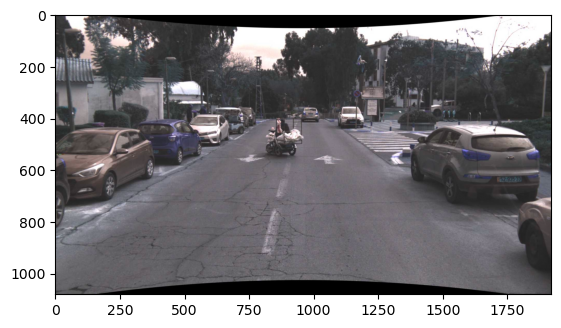

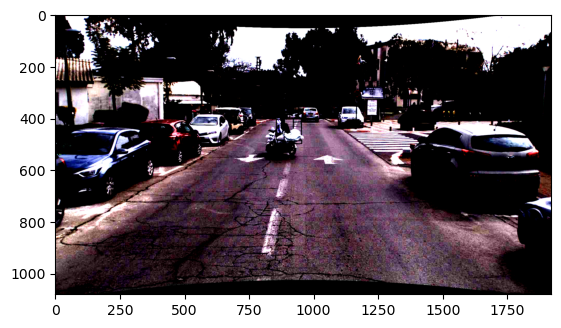

In [ ]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import cv2

import torch
import torchvision.transforms as T

original_image = cv2.imread('/home/imagry/offline_data/sheba_trips/images/2023-02-23T10_36_54/3d_images/3/left/1677141477.240118.jpeg')
tensor_image = torch.Tensor(original_image)
plt.figure(1)
plt.imshow((original_image/255))

norm =T.Normalize(tensor_image.mean(), tensor_image.std())
plt.figure(2)
plt.imshow(norm(tensor_image).numpy()[:,:,::-1])

In [ ]:
trans_tensor_image = tensor_image.permute([2,1,0])
trans_tensor_image.size()

torch.Size([3, 1920, 1080])

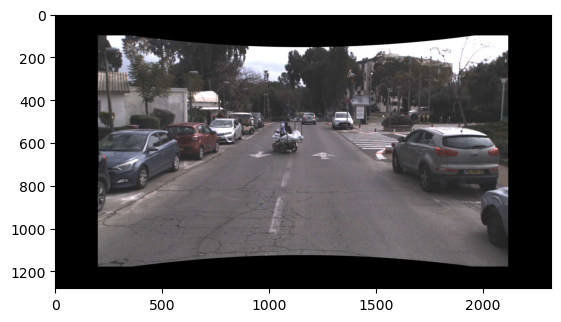

In [ ]:
import torchvision.transforms.functional as TF
# tensor_image = tensor_image.permute(1,2,0)
padded = TF.pad(trans_tensor_image, [100,200])
permute = [2,1,0]
padded_to_display = (padded.permute(2,1,0)/255)[:,:,permute]
plt.imshow(padded_to_display)

In [ ]:
padded.mean()

tensor(77.1453)

## assign OS output to variable

In [ ]:
import os
# a = os.getcwd()
# b = os.system('ls')
c = os.system('ls | grep "json"')

coco_data_from_json.ipynb
json_with_python.py
sample.json


In [ ]:
import subprocess

cmd = "git --version"
cmd2 = 'ls | grep "json"'
returned_value = subprocess.call(cmd2, shell=True)  # returns the exit code in unix
print('returned value:', returned_value)

coco_data_from_json.ipynb
json_with_python.py
sample.json
returned value: 0


In [ ]:
n = os.popen('ls | grep "json"')
m = (n.read())
m.split('\n')

['coco_data_from_json.ipynb', 'json_with_python.py', 'sample.json', '']